EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 2 Fitting and Alignment]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

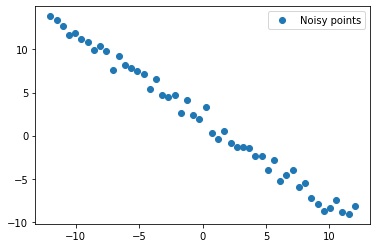

In [2]:
from scipy.optimize import minimize
from scipy import linalg

#np.random.seed(45)
N = 100

half_n = N//2
r = 10
s = r /16

t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t) , (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1) ,y.reshape (half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1) ,y.reshape(half_n, 1)))

X = np.vstack ((X_circ, X_line))

plt.plot(x,y, 'o', label = 'Noisy points')
plt.legend()

In [ ]:
thresh_d = 1
in_count = 20
max_iter = 50




Question 2

In [7]:
# Function to find the points in the image using left mouse click

def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)


In [14]:
im1 = cv.imread(r'./flag.png', cv.IMREAD_ANYCOLOR)
assert im1 is not None
cv.imshow("Image 1",im1)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./images/001.jpg', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

73   55
149   207
518   290
133   520
521   518


(-0.5, 1023.5, 767.5, -0.5)

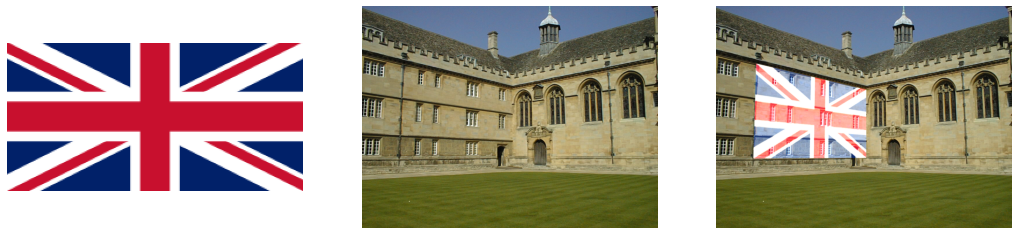

In [16]:
im1 = cv.imread(r'./flag.png', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./images/001.jpg', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[255,0],[0,125],[255,125]]) # flag coords 
pts2 = np.float32([[140,200],[520, 290],[130,520],[520,520]]) # building coords

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im1,M,(cols,rows))

overlay = cv.add(bg, dst)

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
ax[2].axis('off')

In [9]:
im2 = cv.imread(r'./image3.jpg', cv.IMREAD_ANYCOLOR)
assert im2 is not None
cv.imshow("Image 1",im2)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./image5.jpg', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

2   1
329   1
328   438
1   438
0   1
899   2
899   505
667   57
898   40
667   431
898   478


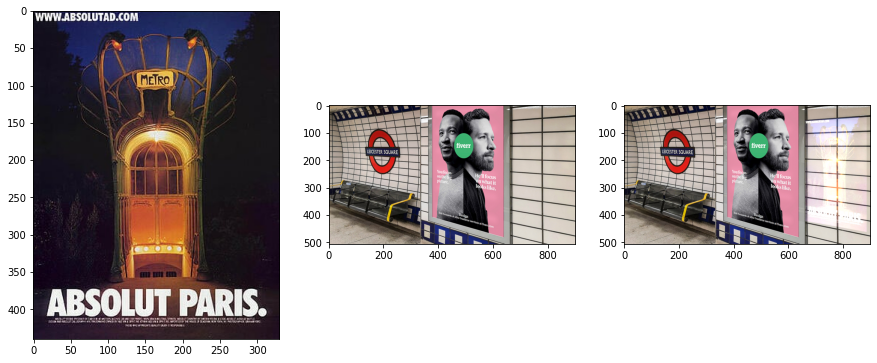

In [18]:
im2 = cv.imread(r'./image3.jpg', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./image5.jpg', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[350,0],[0,450],[350,450]]) # flag coords 
pts2 = np.float32([[660,55],[900,40],[660,430],[900,475]]) # building coords

M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im2,M,(cols,rows))

overlay = cv.add(bg, dst)

fig,ax = plt.subplots(1,3, figsize = (15, 15))
ax[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
#ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
#ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
#ax[2].axis('off')

In [24]:
im3 = cv.imread(r'./image2.jpg', cv.IMREAD_ANYCOLOR)
assert im3 is not None
cv.imshow("Image 1",im3)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

bg = cv.imread(r'./image1.jfif', cv.IMREAD_ANYCOLOR)
assert bg is not None
cv.imshow("Image 2",bg)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

95   43
245   11
162   76
323   28


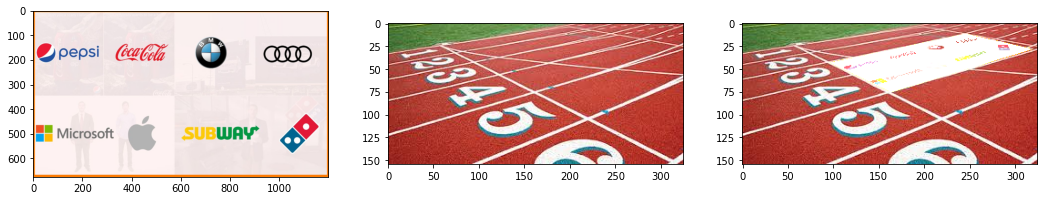

In [25]:
im3 = cv.imread(r'./image2.jpg', cv.IMREAD_ANYCOLOR)
bg = cv.imread(r'./image1.jfif', cv.IMREAD_ANYCOLOR)

rows,cols,ch = bg.shape

pts1 = np.float32([[0,0],[1200,0],[0,670],[1200,670]]) # flag coords 
pts2 = np.float32([[95,43],[245, 11],[162,76],[320,28]]) # building coords
#[97,43],[245, 12],[280,18],[123,58]
M = cv.getPerspectiveTransform(pts1,pts2)    
dst = cv.warpPerspective(im3,M,(cols,rows))

overlay = cv.add(bg, dst)

fig,ax = plt.subplots(1,3, figsize = (18, 18))
ax[0].imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))
#ax[0].axis('off')
ax[1].imshow(cv.cvtColor(bg, cv.COLOR_BGR2RGB))
#ax[1].axis('off')
ax[2].imshow(cv.cvtColor(overlay, cv.COLOR_BGR2RGB))
#ax[2].axis('off')

Question 3

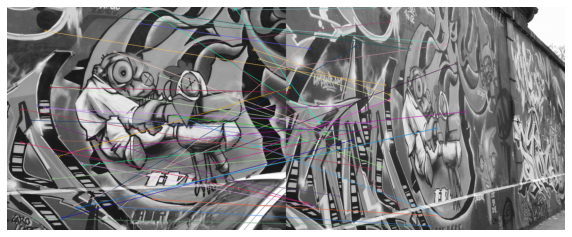

In [7]:
#reading image
img1 = cv.imread('graf/img1.ppm')  
img5 = cv.imread('graf/img5.ppm')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

#keypoints
sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
img3 = cv.drawMatches(img1, keypoints_1, img5, keypoints_2, matches[:50], img5, flags = 2)
plt.imshow(img3)
plt.show()